# Decision Tree for Predictive Modeling

You work for a data-driven company that focuses on predicting customer satisfaction and sales for a retail business. Your task is to build predictive models using decision trees. The dataset contains various customer attributes, shopping behavior, and survey responses. Answer the following questions based on this case study:

# 1. Data Exploration:

a. Load the dataset using Python libraries like pandas and explore its structure. Describe the features, target variables, and data distribution.

b. Discuss the importance of customer satisfaction and sales prediction in the retail business context.

In [1]:
#  Load the dataset using Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('retail.csv')
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
df.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [4]:
# Handling missing data
df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   CPI           7605 non-null   float64
 5   Unemployment  7605 non-null   float64
 6   IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(1)
memory usage: 392.0+ KB


In [6]:
df.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,172.460809,7.826821
std,12.987966,18.678607,0.431337,39.738346,1.877259
min,1.000000,-7.290000,2.472000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,132.364839,6.634000
50%,23.000000,60.710000,3.513000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,213.932412,8.567000
max,45.000000,101.950000,4.468000,228.976456,14.313000


<AxesSubplot: ylabel='count'>

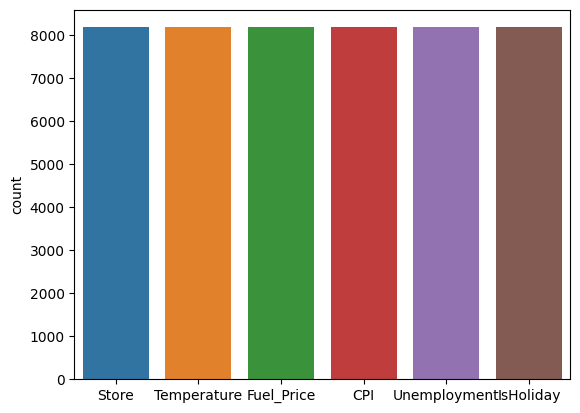

In [7]:
sns.countplot(df)

array([[<AxesSubplot: title={'center': 'Store'}>,
        <AxesSubplot: title={'center': 'Temperature'}>],
       [<AxesSubplot: title={'center': 'Fuel_Price'}>,
        <AxesSubplot: title={'center': 'CPI'}>],
       [<AxesSubplot: title={'center': 'Unemployment'}>, <AxesSubplot: >]],
      dtype=object)

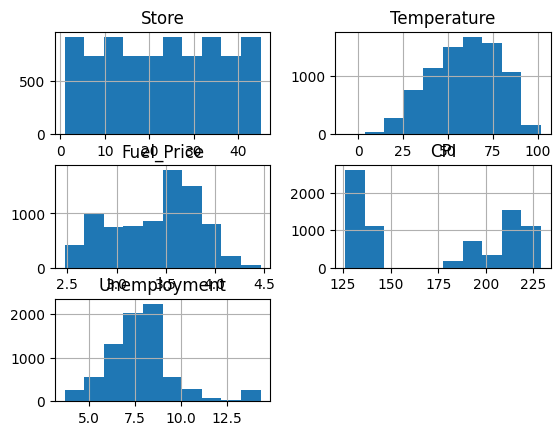

In [8]:
df.hist()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


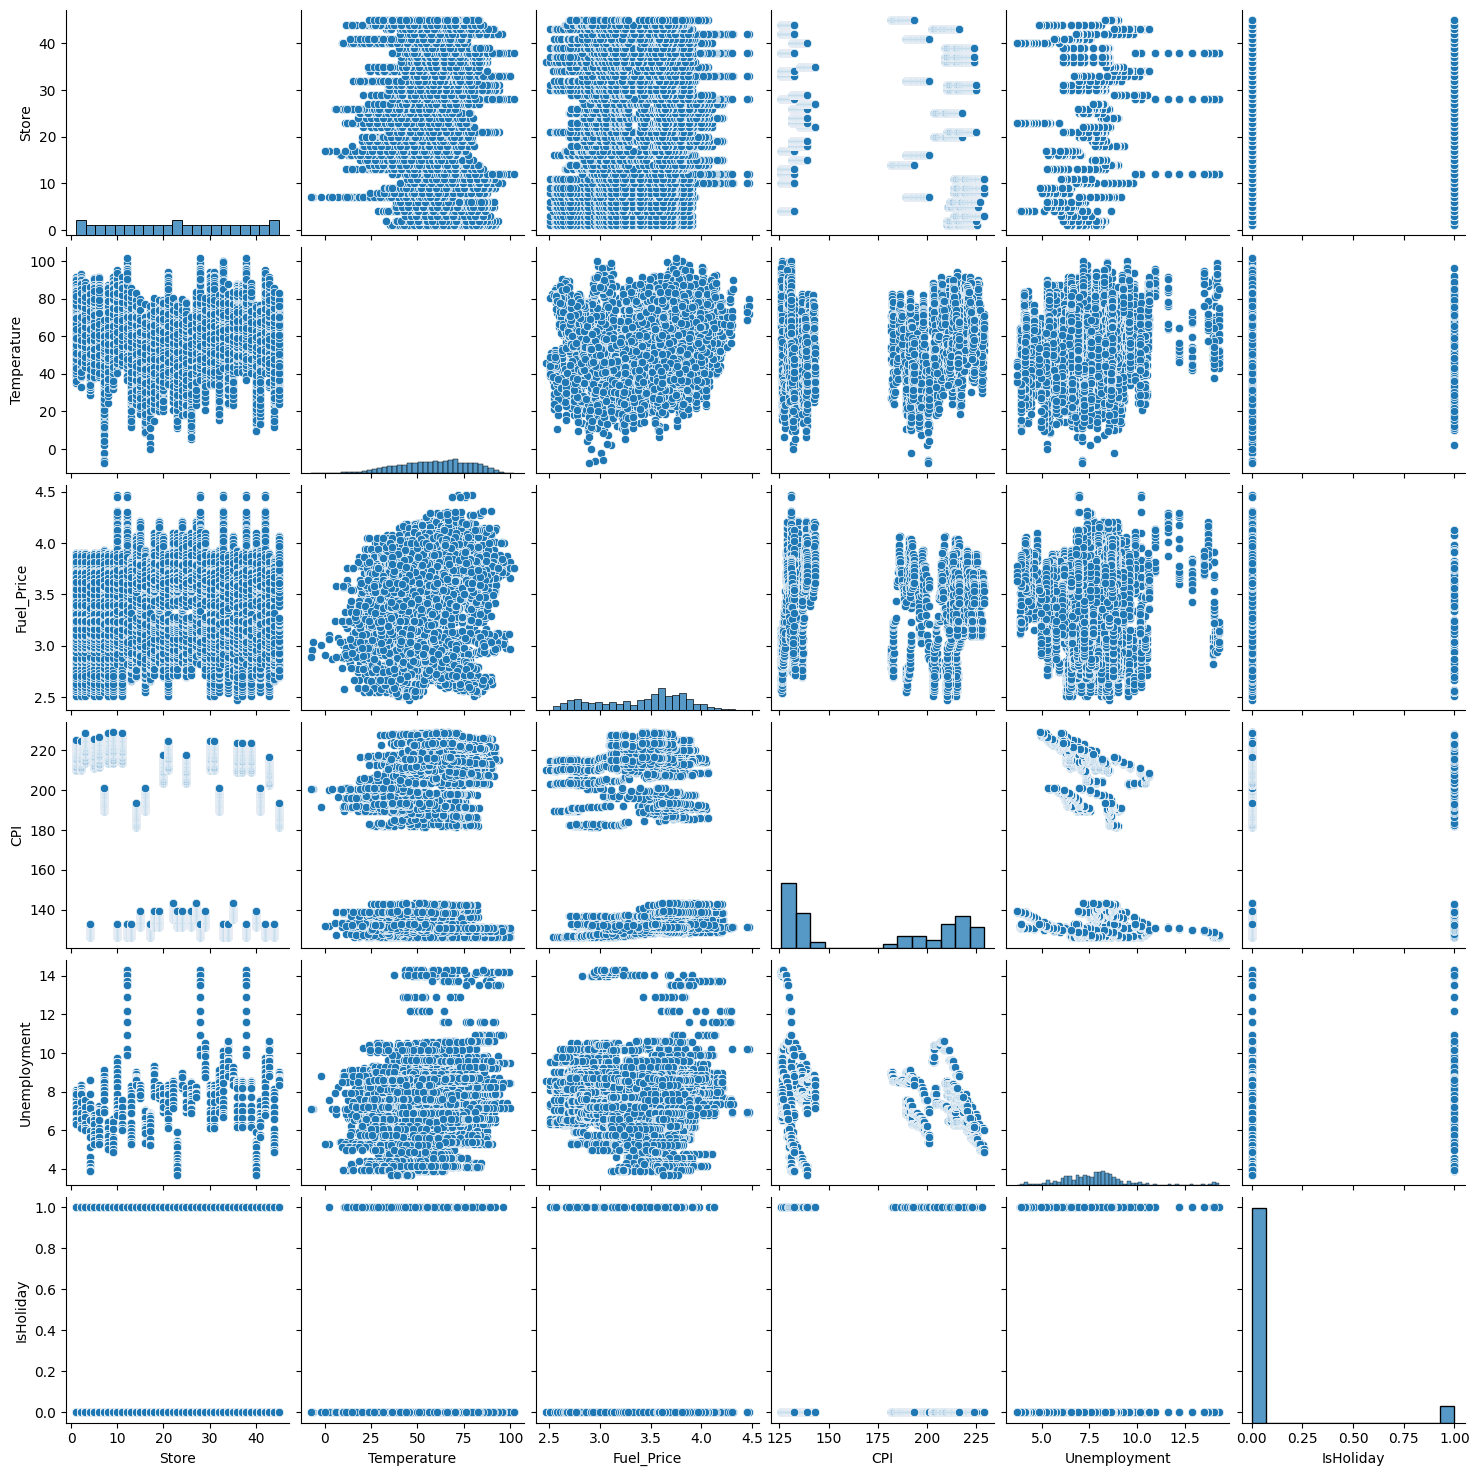

In [10]:
sns.pairplot(df)

# 2. Classification Task Predicting Customer Satisfaction:

a. Implement a decision tree classifier using Python libraries like scikit-learn to predict customer satisfaction.

b. Split the dataset into training and testing sets and train the model.

c. Evaluate the classification model's performance using relevant metrics such as accuracy, precision, recall, and F1-score.


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['IsHoliday'] = le.fit_transform(df['IsHoliday'])
df.head(1)

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,211.096358,8.106,0


In [22]:
# Assign x and y values
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]
x = df.drop('Date', axis=1)

In [23]:
# Implement a decision tree classifier using Python libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
print('****************Decision Tree Classifier*******************')

# Train the classifier
print('Training the model........\n')
dt_classifier.fit(x_train, y_train)
print('Training is completed.....!\n')
print()
print('Testing the model.........\n')
y_pred = dt_classifier.predict(x_test)
print('Predicted label for the input samples:\n', y_pred)
print('\nTesting is completed....!\n')

****************Decision Tree Classifier*******************
Training the model........

Training is completed.....!


Testing the model.........

Predicted label for the input samples:
 [0 0 0 ... 0 0 0]

Testing is completed....!



In [24]:
# Evaluate the classification model's performance

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1521
           1       1.00      1.00      1.00       117

    accuracy                           1.00      1638
   macro avg       1.00      1.00      1.00      1638
weighted avg       1.00      1.00      1.00      1638

Confusion Matrix:
 [[1521    0]
 [   0  117]]

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


# 3. Regression Task - Predicting Sales:

a. Implement a decision tree regression model using Python libraries to predict sales based on customer attributes and behavior.

b. Discuss the differences between classification and regression tasks in predictive modeling.

c. Split the dataset into training and testing sets and train the regression model.

d. Evaluate the regression model's performance using metrics such as mean squared error (MSE) and R- squared.

In [25]:
# Implement a decision tree regression model using Python libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a decision tree regression model
print('****************Decision Tree Regressor*******************')
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the regression model
print('Training the model........\n')
dt_regressor.fit(X_train, Y_train)
print('Training is completed.....!\n')
print()
print('Testing the model.........\n')
Y_pred = dt_regressor.predict(X_test)
print('Predicted label for the input samples:\n', Y_pred)
print('\nTesting is completed....!\n')

****************Decision Tree Regressor*******************
Training the model........

Training is completed.....!


Testing the model.........

Predicted label for the input samples:
 [0.04528833 0.04528833 0.         ... 0.04528833 0.04528833 0.        ]

Testing is completed....!



In [26]:
# Evaluate the regression model's performance
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
import pandas as pd

print('R-squared: \t', r2_score(Y_test, Y_pred))
print('Mean Squared Error: \t', mean_squared_error(Y_test, Y_pred))
print('RMSE:\t',np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('Variance Score:\t', explained_variance_score(Y_test, Y_pred))

R-squared: 	 0.6211053167222078
Mean Squared Error: 	 0.02513076980924132
RMSE:	 0.15852687409156002
Variance Score:	 0.6211070384624348


# 4. Decision Tree Visualization:

a. Visualize the decision tree for both the classification and regression models. Discuss the interpretability of decision trees in predictive modeling.

********************classification model*********************



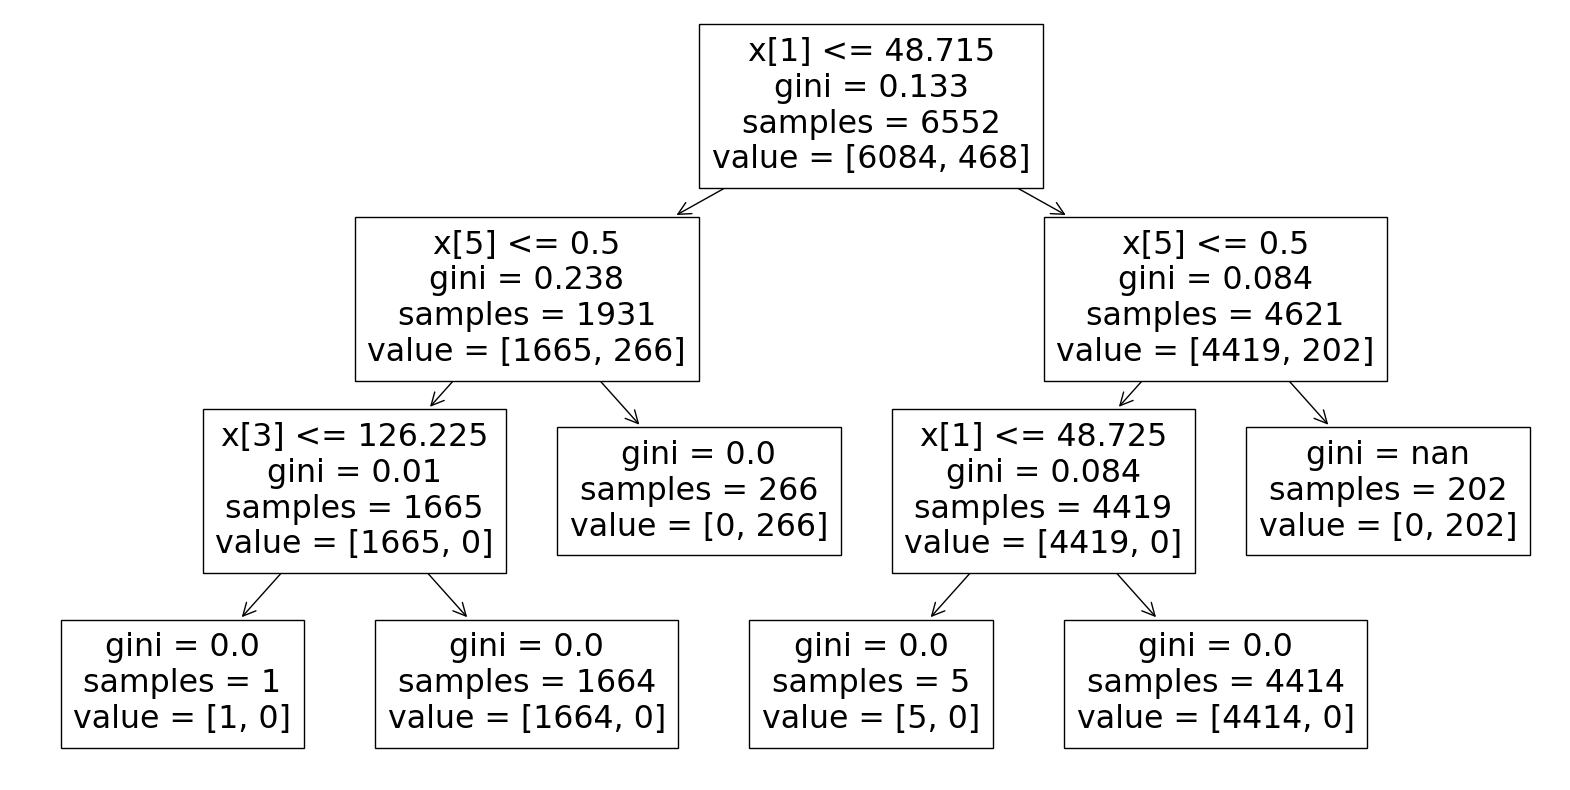

In [34]:
from sklearn.tree import plot_tree
print('********************classification model*********************\n')
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier)
plt.show()

********************regression model*********************



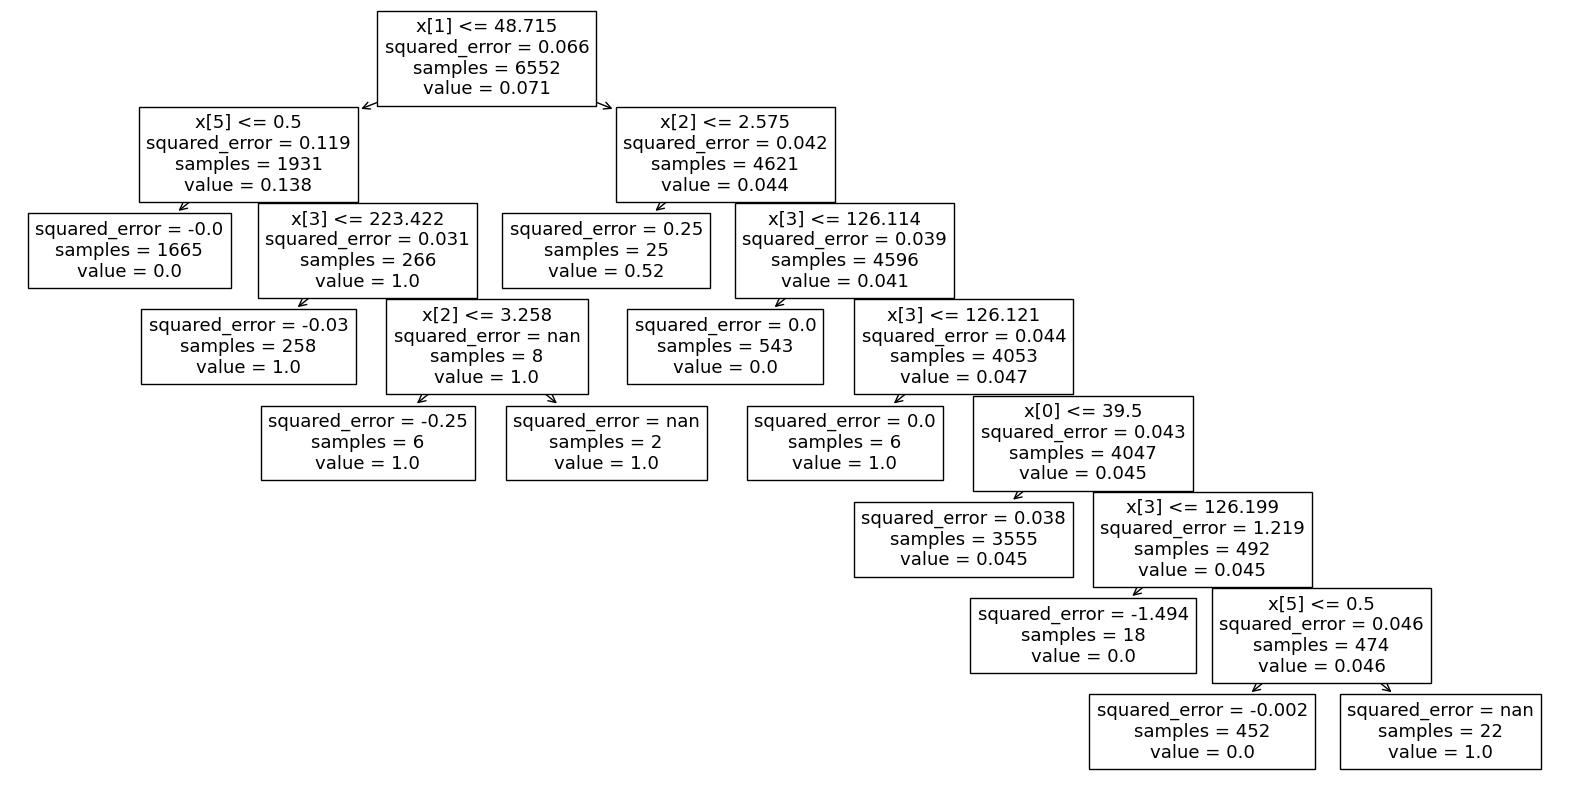

In [35]:
plt.figure(figsize=(20, 10))
print('********************regression model*********************\n')
plot_tree(dt_regressor)
plt.show()

# 5. Feature Importance:

a. Determine the most important features in both models by examining the decision tree structure. Discuss how feature importance is calculated in decision trees.

In [37]:
# For Classification
feature_importance_classification = dt_classifier.feature_importances_

# For Regression
feature_importance_regression = dt_regressor.feature_importances_

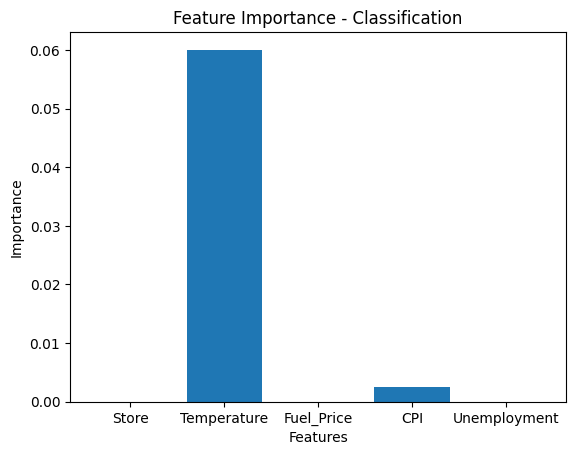

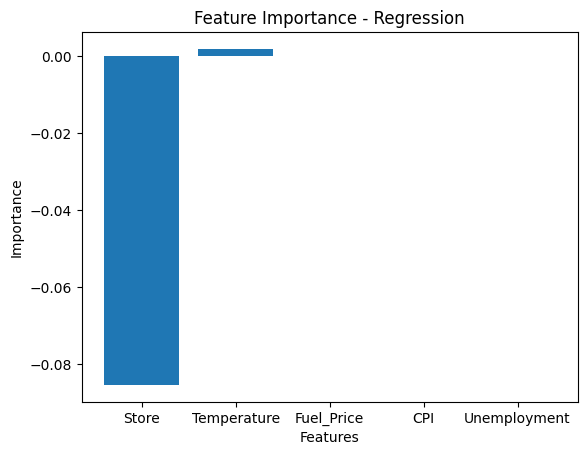

In [38]:
# For Classification
plt.bar(x.columns, feature_importance_classification)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Classification')
plt.show()

# For Regression
plt.bar(x.columns, feature_importance_regression)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Regression')
plt.show()

# 6. Overfitting and Pruning:

a. Explain the concept of overfitting in the context of decision trees.

b. Discuss methods for reducing overfitting, such as pruning, minimum samples per leaf, and maximum depth.

c. Implement pruning or other techniques as necessary and analyze their impact on the model's performance.

In [39]:
# Example for Classification Tree
pruned_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)

print('****************Decision Tree Pruned Classifier*******************')
print('Training the model........\n')
pruned_classifier.fit(x_train, y_train)
print('Training is completed.....!\n')
print()
print('Testing the model.........\n')
y_pred = pruned_classifier.predict(x_test)
print('Predicted label for the input samples:\n', y_pred)
print('\nTesting is completed....!\n')

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

****************Decision Tree Pruned Classifier*******************
Training the model........

Training is completed.....!


Testing the model.........

Predicted label for the input samples:
 [0 0 0 ... 0 0 0]

Testing is completed....!

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1521
           1       1.00      1.00      1.00       117

    accuracy                           1.00      1638
   macro avg       1.00      1.00      1.00      1638
weighted avg       1.00      1.00      1.00      1638

Confusion Matrix:
 [[1521    0]
 [   0  117]]

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [40]:
# Example for Regression Tree
pruned_regressor = DecisionTreeRegressor(random_state=42, max_depth=5)
pruned_regressor.fit(X_train, Y_train)

print('****************Decision Tree Pruned Regressor*******************')
pruned_regressor = DecisionTreeRegressor(random_state=42)

# Train the regression model
print('Training the model........\n')
pruned_regressor.fit(X_train, Y_train)
print('Training is completed.....!\n')
print()
print('Testing the model.........\n')
Y_pred = pruned_regressor.predict(X_test)
print('Predicted label for the input samples:\n', Y_pred)
print('\nTesting is completed....!\n')

print('R-squared: \t', r2_score(Y_test, Y_pred))
print('Mean Squared Error: \t', mean_squared_error(Y_test, Y_pred))
print('RMSE:\t',np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('Variance Score:\t', explained_variance_score(Y_test, Y_pred))

****************Decision Tree Pruned Regressor*******************
Training the model........

Training is completed.....!


Testing the model.........

Predicted label for the input samples:
 [0.04528833 0.04528833 0.         ... 0.04528833 0.04528833 0.        ]

Testing is completed....!

R-squared: 	 0.6211053167222078
Mean Squared Error: 	 0.02513076980924132
RMSE:	 0.15852687409156002
Variance Score:	 0.6211070384624348


# 7. Real-World Application:

a. Describe the practical applications of customer satisfaction prediction and sales forecasting in the retail industry.

b. Discuss the potential benefits of using predictive models in retail business operations and decision- making.

# 8. Model Comparison:

a. Compare the performance of the decision tree classification and regression models.

b. Discuss the trade-offs, advantages, and limitations of decision trees for different types of predictive tasks.

# 9. Presentation and Recommendations:

a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the retail business. Highlight the significance of predictive modeling and the insights gained from decision tree models.

In this case study, you are required to demonstrate your ability to use decision trees for both classification and regression tasks, understand the importance of feature selection and pruning, and communicate the practical applications of predictive modeling in a real-world context.